# Introduction

In this notebook I run through the theory asociated with the microbial competition experiments. The basic idea is to develop a model which describes the temperature dependence of respiratory flux in communities with interacting species. This requires the model to not only describe the temperature dependence of metabolism itself (as classic MTE does) but also the change in flux that occurs due to the species interactions and their effects on population growth. 

# What drives the temperature dependence of respiration?

For any given ecosystem the total respiratory carbon flux, $R_{eco}$, can be written as the sum of respiratory  fluxes across all $N$ species in the system:

$$
R_{eco} = \sum_i^N R_i
$$

which in turn can be written as the product of the mass-specific respiratory flux $\tilde{R}_i$ and the total biomass for each population $C_i$:

$$
R_{eco} = \sum_i^N R_i = \sum_i^N \tilde{R}_i C_i
$$

Thus carbon flux at an ecosystem level is driven not only by mass-specific rates of respiration but also the amount and distribution of biomass in the system. 

## Temperature dependence 
Classically metabolic theory has considered only the former of these two aspects, focusing on the effects of mass and temperature on the rate of respiration. In terms of temperature this is done by using the Arrhenius equation to represent respiratory rate:

$$
\tilde{R}_i(T) = \tilde{R_i}_0 e^{-E_\tilde{R_i} (T_r - T_{ra})}
$$

where $\tilde{R}_i(T)$ is the respiration at temperature $T$, $\tilde{R}_{i0}$ is respiration at some reference temperature, $E_{\tilde{R}_i}$ is the the temperature sensitivty of respiration and $T_r$ and $T_{ra}$ are the Boltzmann corrected temperature and reference temperature respectively. Substituing this into the equation above then gives:

$$
R_{eco} = \sum_i^N \tilde{R_i}_0 e^{-E_\tilde{R_i} (T_r - T_{ra})} C_i
$$

which we can simplify by expressing the temperature component relative to $T_{ra}$ giving $\Delta_T = T_r - T_{ra}$:

$$
R_{eco} = \sum_i^N \tilde{R_i}_0 e^{-E_\tilde{R_i} \Delta_T } C_i
$$

## Biomass 
Though informative, this approach ignores the dependence of biomass upon temperature which arrises from the effects of temperature on population growth rates and the interactions between species. Integrated through time, changes to the rates of population growth with temperature will alter the amount of biomass in any species population leading to temperature dependent biomass. 

We can formalise this idea by considering some function $f$ which describes the rate of biomass growth for a single species:

$$
\frac{dC_i}{dt} = f_i(T, \vec{C})
$$

This function is dependent on the biomasses of other species in the system $\vec{C}$ and temperature $\Delta_T$. Integrating this overtime will yeild some function giving us biomass which itself will be a function of temperature and time $t$:

\begin{align}
C_i(t,T) &= \int_0^t f_i(T, \vec{C}) dt \\
R_{eco} &= \sum_i^N (\tilde{R_i}_0 e^{-E_\tilde{R_i} \Delta_T }) C_i(t,T)
\end{align}

Thus it is clear that to consider the temperature dependence of total ecosystem respiration we must consider botht the direct effects of temperature on metabolism (the LHS of the multiplication) and the indirect effects that occur via temporal biomass dynamics (the RHS).

### The Effect of Interactions

Given that we are interested in the effect of interations on ecosystem respiration and it's response to temperature we need to make explicit the model describing interactions between populations. One approach we can take here is to use the generalised Lotka-Volterra model which describes interactions using only linear terms:

$$
\frac{dC_i}{dt} = C_i( r_i(\Delta_T) + \sum^N_{j=1} a_{ij}(\Delta_T) C_j)
$$

where $r_i$ is the intrinsic growth rate of species $i$ (which is dependent on metabolism and should be related to respiration) and $a_{ij}$ describes the per capita effect of species $j$ on species $i$ (i.e. its capacity to increase or decrease its growth rate). Note the last term also includes the intraspecific effect which is assumed to be negative, indicating density dependence.

Though it is not possible to obtain a solution to this equation we can see looking at the integral:

\begin{align}
C_i(t) &= C_i(0) e^{r_i(\Delta_T) t} e^{\int_0^t \sum_{j=1}^N a_{ij}(\Delta_T) C_j(t) dt } 
\\
&= C_i(0) e^{r_i(\Delta_T) t} e^{\sum_{j=1}^N a_{ij}(\Delta_T) \int_0^t C_j(t) dt }
\end{align}

that the biomass of any species at time $t$ is determined by its initial value $C_i(0)$, the contributions of it's intrinsic growth over time $e^{r_i(\Delta_T) t}$ and the effect of other species biomass $e^{\int_0^t \sum_{j=1}^N a_{ij}(\Delta_T) C_j(t) dt}$. Temperature enters here three times influencing the intrinsic rate of growth $r_i(\Delta_T)$, the strength of the interactions with other species and themselves $a_{ij}(\Delta_T)$ and in the integral giving the biomass of each species $\int_0^t C_j(t) dt = C_j(\Delta_T,t)$. 

Broadly, we can see that stronger interactions will alter the temperature response (as they are multiplied by the intergral) with their sign affecting the direction of this change. Importantly this effect occurs even when interactions themselves are not temperature dependent as the biomass itself has a temperature dependence.

## Simulations

As mentioned above we cannot analytically solve a multispecies system to get the effect of interactions on ecosystem level respiration. We can however, use numerical simualtions to get an idea about the effect of interactions on respiratory output. 

For the simualtions below I use the generalised Lotka-Volterra  model:

\begin{align}
    \frac{dC_i}{dt} &= C_i (r_i(T) + \sum_{j = 0}^{N} a_{ij}(T) C_j)
\end{align}

The equation here describes the biomass growth of population $i$ which is given by its intrnsic growth (i.e. maximal growth in the absence of any limiting factors) plus the effects of any inter- or intraspecific interactions encoded in the $\sum_{j=0}^{N} a_{ij} C_j$. Both of these factors are expected to change over temperature due their fundamental metabolic basis and as such are represented as functions of temperature 

This model, though simplistic, allows us to capture the key features of the experimental system including the strength/sign of the interactions between species and thier effects over time. Below I show some simulation results showing the effect of changing interaction strength on total biomass and rates of respiration.

### Interactions
I start by looking at how the respiration in this system over time changes as we alter the intensity of interactions between species (with no change in temperature). In this simualtion species intrinsic growth rates $U$ are randomly generated and only the values of the interaction matrix $a_{ij}$ are varied from systems with  competitve interactions (in black) to those with facilative interactions (in blue). The red line is the null model in which species do not interact directly. 

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



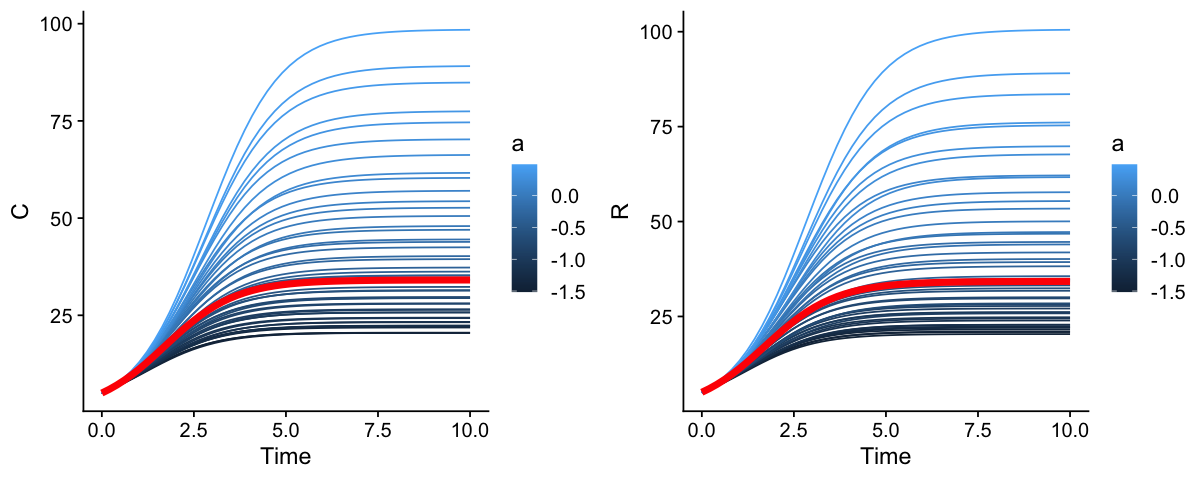

In [23]:
library(tidyverse)
library(cowplot)

source("Helper_scripts/R/simulation_analysis.R")

options(repr.plot.width = 10, repr.plot.height = 4)

plot_grid(p1,p2)

### Temperature
We can see above that interactions alter the respiratory flux but how does that interact with temperature? To look at this I simulated the sytems above (varying in interaction type) across a range of temperatures. In these simulations the rate of growth $r$, respiration $R$ and interactions $a_{ij}$ were all represented with boltzmann arrhenius equations. By simulating across temperatures we can look at the temperature sensitivity of respiration for the whole system.

#### Just Temperature
I first present the temperature response for an single system (with a given interaction matrix) to show the general effects of temperature on respiration.

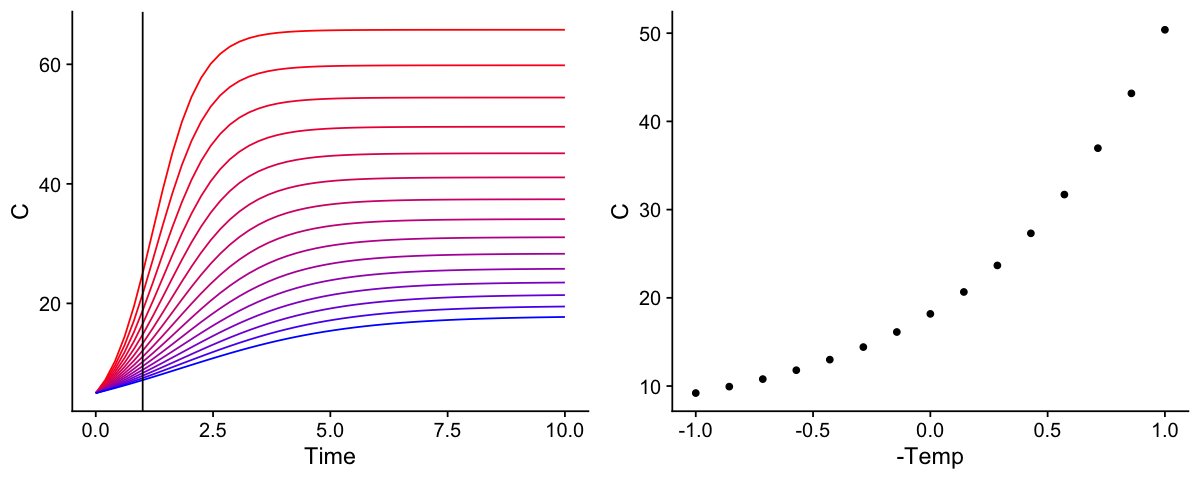

In [24]:
plot_grid(p3,p4)

The left figure here shows respiratory flux over time at different temperatures (red being hot and blue cold). The right pannel shows the respiratory flux against temperature at $t = 0$.

#### Across interaction strengths
In order to look at the effects of interaction strength on this relationship I consider the ecosystem respiratory flux occuring at a single timepoint across all systems. Using the time at the vertical value in the plots above we can look at the respiration vs temperature curve across a range of interaction strengths:

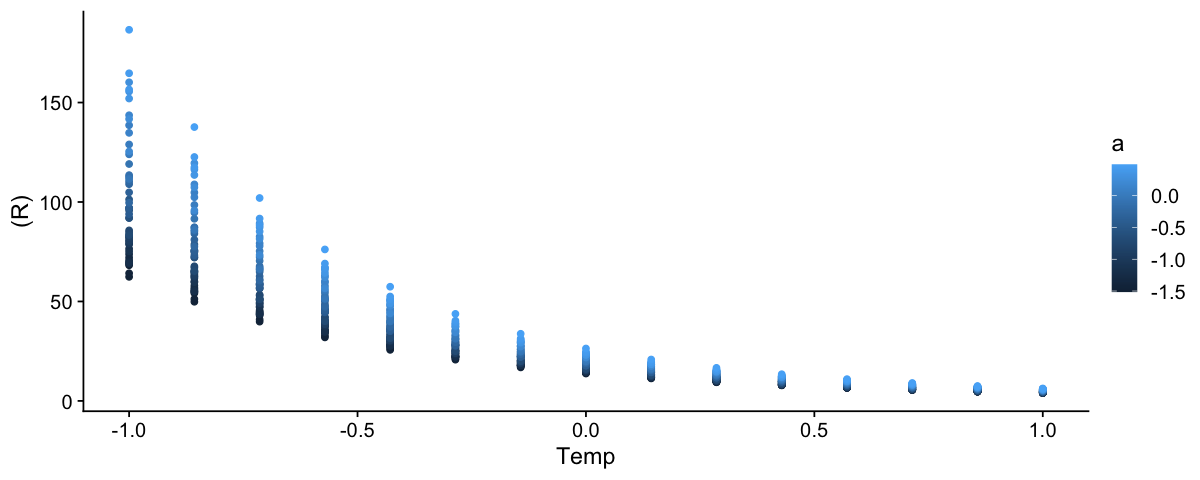

In [25]:
plot(p5)

Thus we can see that as interactions get more facilative (black to blue) we see a higher temperature sensitvity of respiration in the exponential phase. 

Finally ploting these in logscale we can look at the gradient of these lines to get an estimate of the  E value which clearly increases as we change the average interaction strength across the community:

In [26]:
fits <- bind_rows(df_list) %>%
    nest(-E,-aN, -tN) %>%
    mutate(fit = map(data, ~lm( log(R) ~ (Temp), data = .x)))

fits$E_est <- unname(unlist(lapply(fits$fit,function(x){coef(x)[2]})))

Warning message:
“All elements of `...` must be named.
Did you want `data = c(Time, Temp, R, a, C)`?”


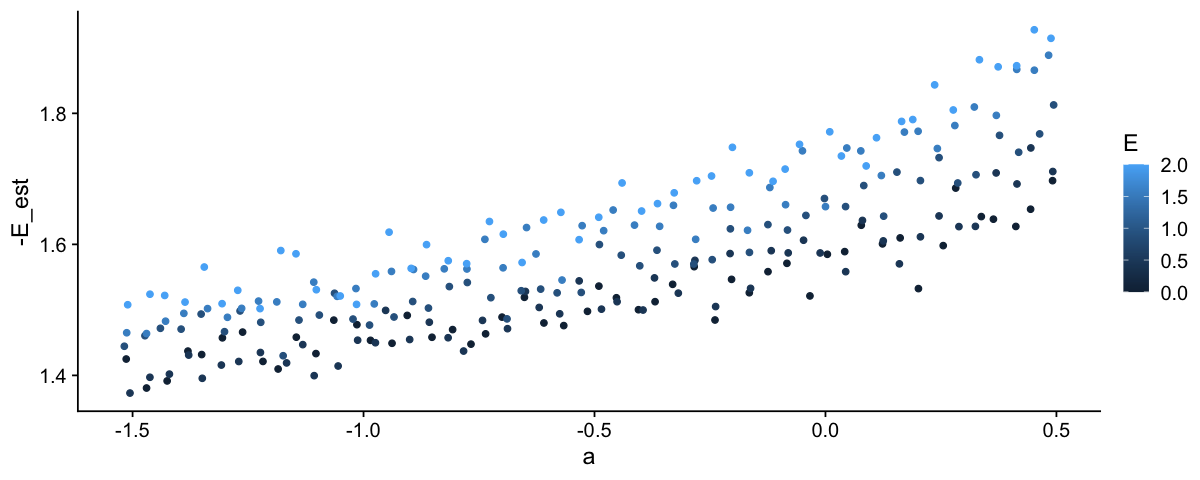

In [27]:
fits %>%
    select(-fit) %>%
    unnest(cols = c(data)) %>%
    filter(Temp == 0.0, E %in% sampled_mode(E,c(0.1,0.25,0.5,0.75,1.0)), tN == 10 )  %>%
    ggplot(aes(x=a, y = -E_est,colour = E, group = paste(aN)))+
        geom_point()+
        theme_cowplot()


Thus it is clear that systems with more faciative interactions will tend to be more sensitive to temperature in their respiratory fluxes.  

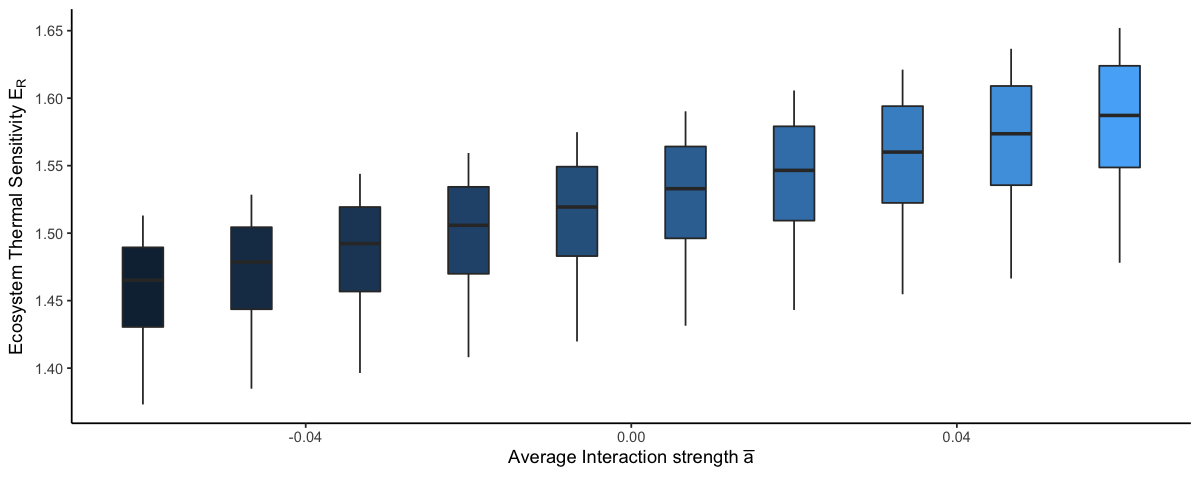

In [28]:
#INTERACTIONS
int_vec = seq(-3,3,length.out = 10) / 50

pred = read_csv("Data/Fig_1/E_vals/predicted_E.csv",
                col_types = cols(), col_names = as.character(int_vec)) %>%
        mutate(rep = 1:n(), type = "Simulated") %>%
        pivot_longer(1:10, names_to = "Interaction", values_to = "E_R")

p1 = rbind(pred) %>%
    mutate(Interaction = as.numeric(Interaction)) %>%
    ggplot(aes(x=Interaction, y = -E_R, fill = Interaction, group = Interaction))+
        geom_boxplot()+
        theme_classic()+
        theme(legend.position = "none") +
        xlab(expression(paste("Average Interaction strength ",bar(a))))+
        ylab( expression(paste("Ecosystem Thermal Sensitivity ",  E[R] )))
 p1 

`summarise()` regrouping output by 'Interaction' (override with `.groups` argument)



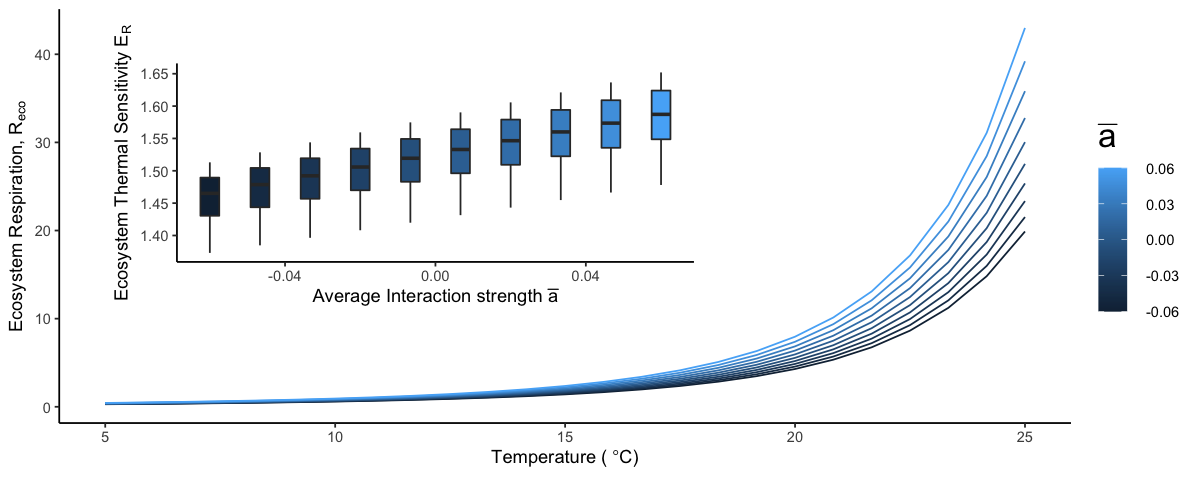

In [29]:
Rep = as.character(1:10)
Temp = seq(5,25,length.out = 25)

#files 
f_list = list.files("Data/Fig_1/R_vals/",full.names = T)
ind = sort(as.numeric(str_extract(f_list,"[0-9]*(?=.csv)")), index.return = TRUE)$ix

f_list = f_list[ind]
i = 1
Data = list()



for(i in 1:length(f_list)){
   Data[[i]] <- read_csv(f_list[i],col_types = cols(), col_names = Rep) %>%
                mutate(Temp = Temp, Interaction = int_vec[i]) %>%
                pivot_longer(1:10,names_to = "Replicate",values_to = "Respiration")
    
}



df <- bind_rows(Data) %>%
    group_by(Interaction,Temp) %>%
    summarise(avg = mean(Respiration), x = quantile(Respiration, c(.01)),y = quantile(Respiration, c(.99)))

p_final <- df %>%
    ggplot(aes(x=Temp, y = avg, color = Interaction, group = Interaction))+ 
        geom_line()+
        annotation_custom(ggplotGrob(p1),xmin = 5, xmax= 18, ymin = 10, ymax = 40)+
        ylab(expression(paste("Ecosystem Respiration, ",R[eco])))+
        xlab(expression(paste('Temperature (',~degree,'C)',sep='')))+
        labs(colour = expression(bar(a)))+
        theme_classic()+
        theme(legend.title = element_text(size = 20))

p_final

In [30]:
ggsave2("../docs/Figs/maintext/Fig_1_B.pdf", p_final,height = 5)

Saving 7 x 5 in image



# Data

So now we have a prediciton of how interactions hould affect the temperature sensitvity of whole system flux we can see how this compares to the data. Whilst a complete quantitative prediction of respiration rates is not feasable we can see how the change in interactions between species across evolved and non-evolved treatements affects $E_{R_{eco}}$

To do this we need to:
1. Estimate interaction networks for each treatment at each temperature
2. Take these estimates and using the framework above predict how $E_{R_{eco}}$ changes

## Estimating interactions 

To estimate interactions we use the observed difference in growth rates when species are grown in isolation vs when they are grown in pairs. This definition of interactions can be derived by considering the equation describing the growth of species pair:

$$
    \frac{dN_{i}}{dt} = N_i (r_i + a_{ii} N_i + a_{ij} N_j) \quad \frac{dN_{j}}{dt} = N_j (r_j + a_{jj} N_j + a_{ji} N_i)
$$

assuming that at $t=0$ the growth of the pair can be approximated using exponential growth and the biomasses of each species are equal we can define:

$$
\left. \frac{dN_{p}}{dt} \right \lvert_{t = 0} = \left. \frac{dN_{i}}{dt} \right \lvert_{t = 0} + 
                                                 \left. \frac{dN_{j}}{dt} \right \lvert_{t = 0} \approx 
                                                 r_{p} N_p \\
$$


$$
N_p(0) = N_i(0) + N_j(0)\\
N_i(0) = N_j(0) = \frac{N_p(0)}{2}
$$

which gives the expression:

\begin{align}
r_{p} N_p(0) &= N_i(0) (r_i + a_{ii} N_i(0) + a_{ij} N_j) + N_j(0) (r_j + a_{jj} N_j(0) + a_{ji} N_i(0)) 
\\
\\
&= \frac{N_{p}(0)}{2} (r_i + r_j) + \frac{N_{p}(0)}{2}^2 (a_{ii}+a_{jj}) + \frac{N_{p}(0)}{2}^2(a_{ij} + a_{ji})
\end{align}

then assuming that interactions are symmetric $a_{ij} = a_{ji} = \alpha_{ij}$

\begin{align}
r_{p} N_p(0) &= \frac{N_{p}(0)}{2} (r_i + r_j) + \frac{N_{p}(0)}{2}^2 (a_{ii}+a_{jj}) + \frac{N_{p}(0)}{2}^2(2 \alpha_{ij})
\end{align}

$$
\alpha_{ij} = \frac{2r_p - r_i - r_j}{N_p(0)} - \frac{a_{ii} + a_{jj}}{2}
$$

So the interaction between two species is given by the difference growth rate between their pairwise and individual experiments. 

### Reading in data

Warning message:
“Missing column names filled in: 'X1' [1]”
Joining, by = c("Temperature", "Treatment")



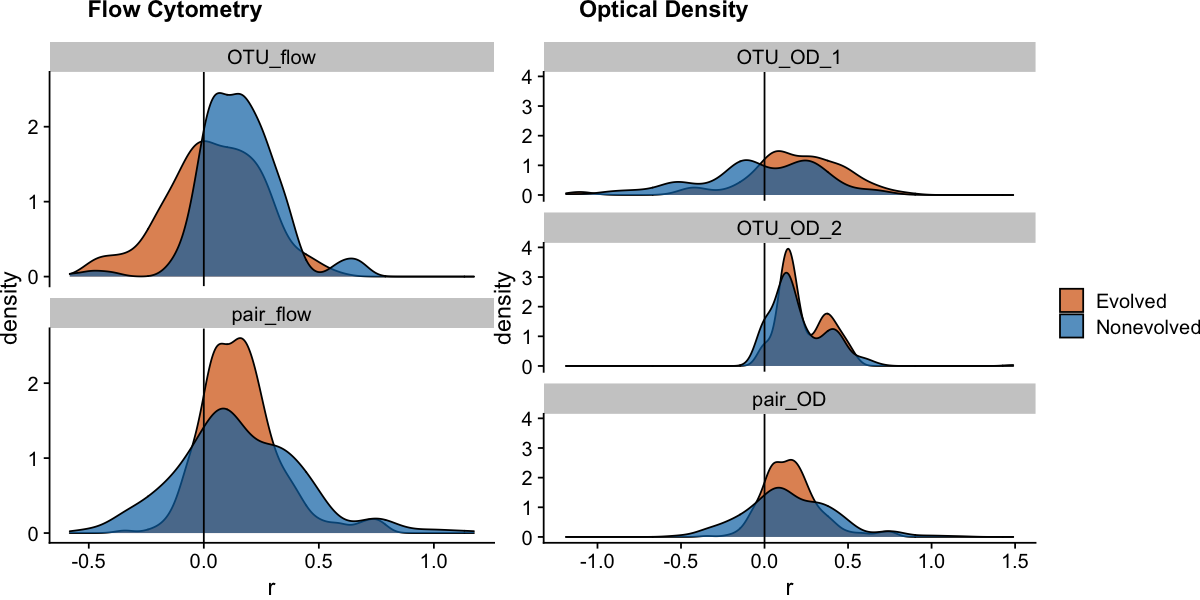

In [42]:
source("Helper_scripts/R/functions.R")
source("Helper_scripts/R/data_analysis.R")

options(repr.plot.width = 10, repr.plot.height = 5)

plot_grid(p6,p7,labels = c("Flow Cytometry","Optical Density"), rel_widths = c(.7,1),vjust = 1.0)

Here I plot the distributions of growth rates from each dataset. On the Left you can see the flow cytometry data and on the right the optical density data. The pannels correspond to the different datasets. For the flow cytometry data both are from the respiration experiments. The optical density data comes from both the respiration experiments (`OTU_OD_1` and `pair_OD`) and the later full growth curves (`OTU_OD_2`). Looks like there is good agreement between the ranges of $r$ values within each measurement type.

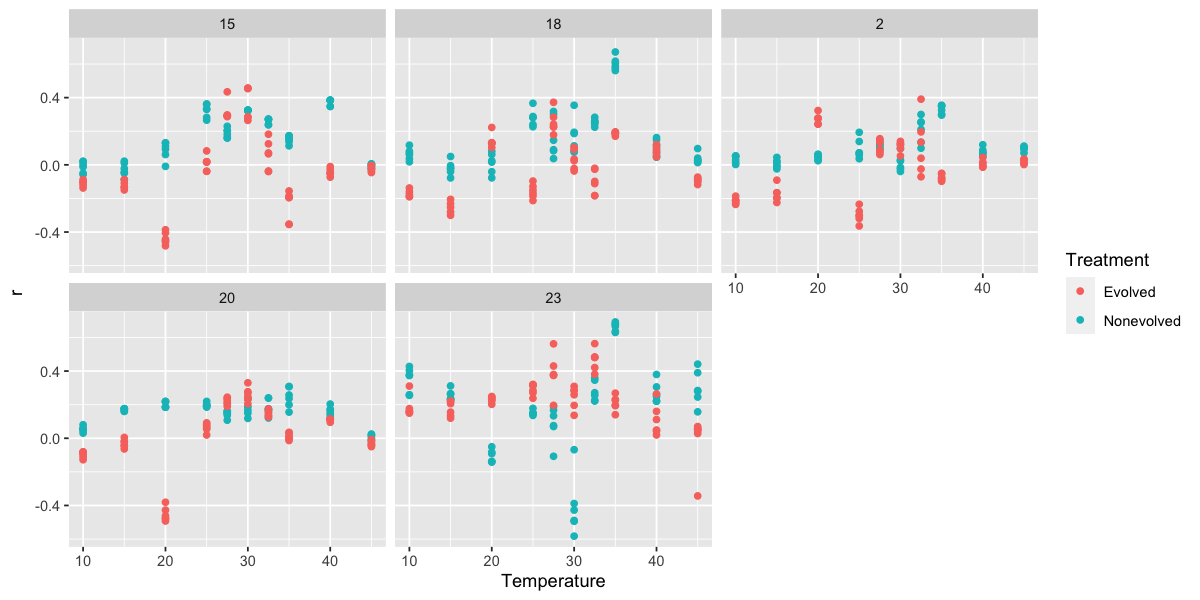

In [43]:
OTU_r_flow %>%
    ggplot(aes(x= Temperature, y = r, colour = Treatment))+
        geom_point() +
        facet_wrap(~OTU)

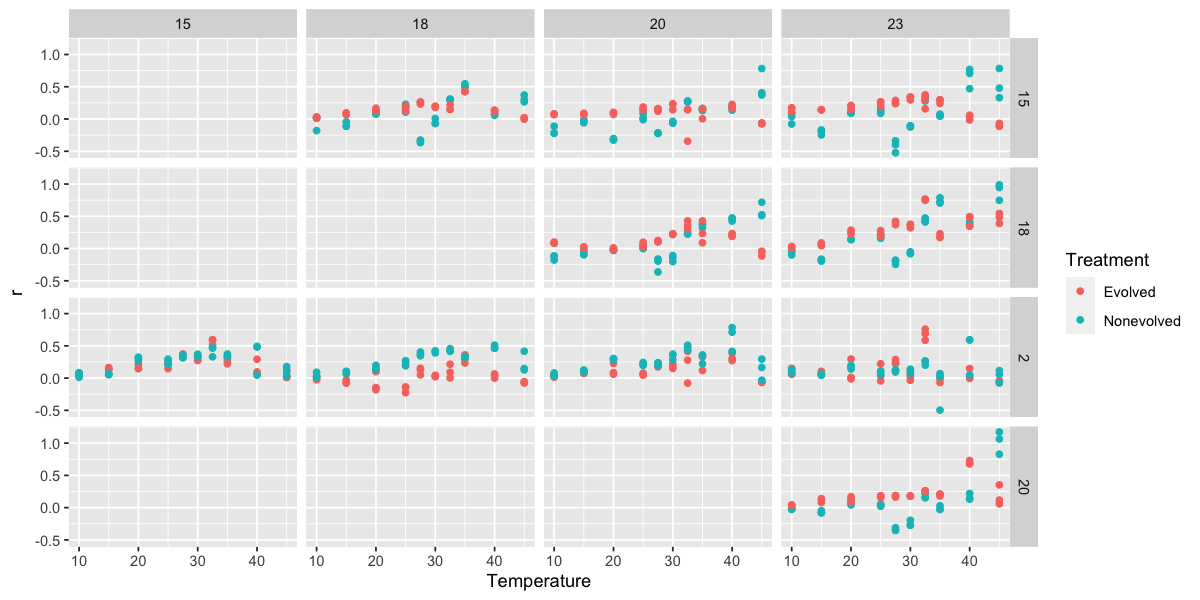

In [44]:
pairs_r_flow %>% 
    ggplot(aes(x = Temperature, y = r, colour = Treatment))+
        geom_point()+
        facet_grid(OTU_1~OTU_2)

## Looking at growth rate vs temperature 

next we look at the flow cytometry growth rate data against temperature.

### Bootstraping $\alpha$ values
We now use the equation above to get estimates of interactions between species for each pair, temperature ad treatment in the experiment. We use a bootstraping procedure to generate distributions of estimates using the individual observations of growth rates from the experiments. The procedure is as follows:

1) For a given temperature, treatment and pair sample (with replacement) 1000 observations of individual respiraiton $R_i$ and growth rates $r_i$ as well as the growth rates $r_p$ and $N(0)$ values associated with each pairwise observation. Intraspecific interaction strength is set such that $K_i = \frac{r_i}{a_{ii}} = 1 * 10^8$ for all species.

2) For these 1000 values calculate $\alpha_{ij}$ using the equation above.

3) save the resutling $\alpha$ values as well as the parameters rates used to calculate them. 

### Results

First we can look at the estimates of interactions across growth rate to make sure there is no crazy bias ect. 

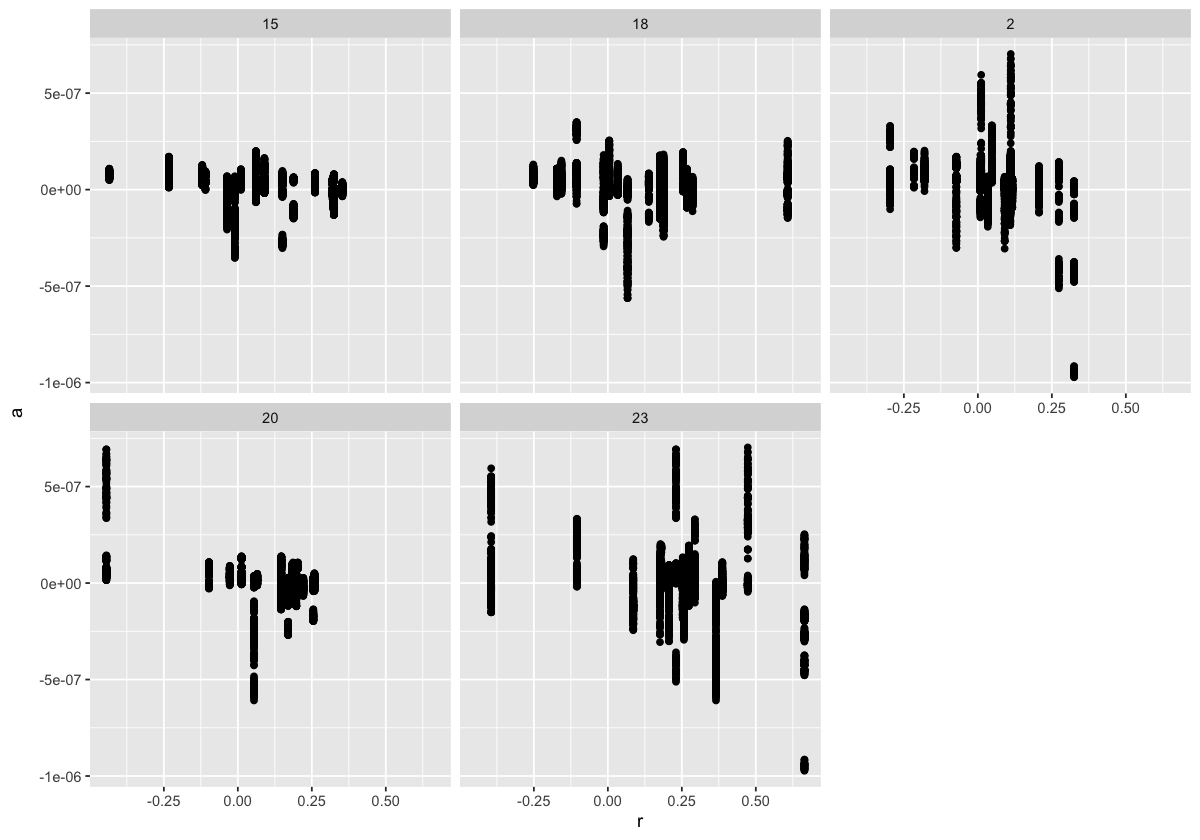

In [45]:
library(lme4)
library(mixedup)
library(MuMIn)

#diff data
diff_df <- bind_rows(int_list_flow) %>%
    group_by(Treatment) %>%
    mutate(n = 1:n()) %>%
    pivot_wider(names_from = Treatment, values_from = a) %>%
    mutate(a_diff = Evolved - Nonevolved,
           OTU_pair = paste(OTU_1,OTU_2)) %>%
    filter(Temperature < 40) %>%
    mutate(a_diff_scaled = scale(a_diff),
           a_diff_pos = a_diff - min(a_diff),
           T_ref = Temperature - 20)
#get index
growth <- grw_list_flow %>%
    bind_rows() %>%
    group_by(OTU,Temperature,Treatment) %>%
    summarise(ur = mean(r), .groups = "drop") %>%
    mutate(id = paste(OTU,Temperature,Treatment,sep = "_"))

growth_ind <- growth$ur
names(growth_ind) <- growth$id

x <- diff_df %>%
    pivot_longer(c(OTU_1,OTU_2),values_to = "OTU") %>%
    pivot_longer(c(Evolved,Nonevolved),names_to = "Treatment",values_to = "a") %>%
    select(-a_diff,-a_diff_scaled,-a_diff_pos,-T_ref,-name) %>%
    mutate(id = paste(OTU,Temperature,Treatment,sep = "_")) %>%
    mutate(r = recode(id,!!!growth_ind)) 

options(repr.plot.width = 10, repr.plot.height = 7)

x %>%
    ggplot(aes(x=r,y=a))+
        geom_point()+
        facet_wrap(~OTU)

And then plotting the actual interaction estimates across temperature

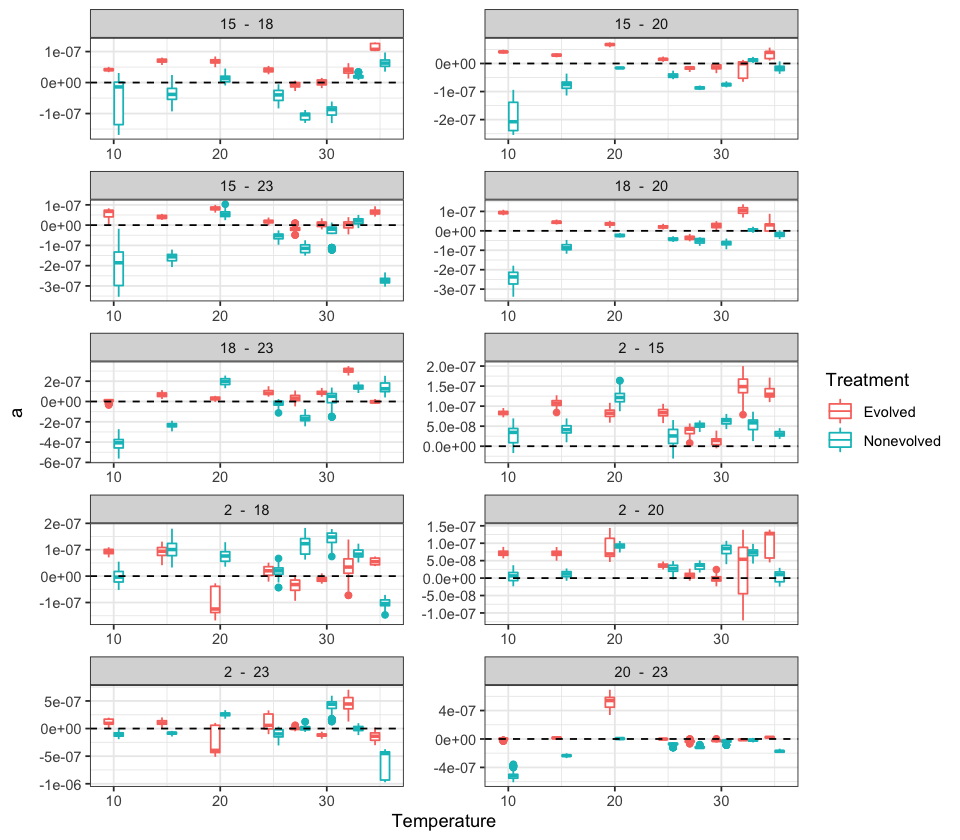

In [46]:
options(repr.plot.width = 8, repr.plot.height = 7)

Int_data = bind_rows(int_list_flow) %>%
    filter(Temperature < 40)  

Int_data %>%
    ggplot(aes(x = Temperature, y = a ,colour = Treatment, 
               group = paste(Temperature,Treatment)))+
#         geom_point()+
        geom_boxplot()+
        geom_hline(yintercept = 0.0, linetype = "dashed") +
        facet_wrap(~paste(OTU_1," - ",OTU_2),ncol = 2, scales = "free")+
        ylab("a") + 
        theme_bw() 

# ggsave("../notebooks/figures/a_original.pdf",p1,width = 10, height = 10)

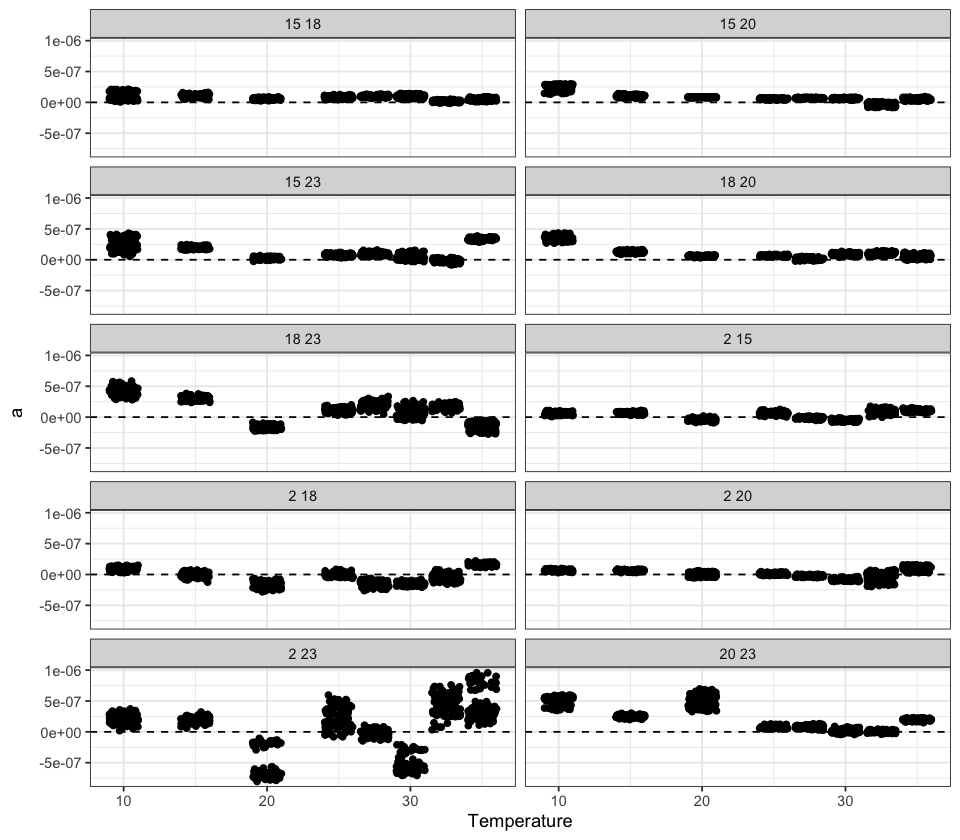

In [47]:
options(repr.plot.width = 8, repr.plot.height = 7)

diff_df %>%
     ggplot(aes(x = Temperature, y = a_diff, group = Temperature))+
        geom_jitter()+
        geom_hline(yintercept = 0.0, linetype = "dashed") +
        facet_wrap(~OTU_pair,ncol = 2)+
        ylab("a") + 
        theme_bw()+
        theme(axis.text.x = element_text(angle = 0))

In [18]:
#fit model
mixed_model_quad = lmer(data = diff_df, a_diff ~ poly(T_ref,1) + (1 + poly(T_ref,1)|OTU_pair))
summary(mixed_model_quad)

Linear mixed model fit by REML ['lmerMod']
Formula: a_diff ~ poly(T_ref, 1) + (1 + poly(T_ref, 1) | OTU_pair)
   Data: diff_df

REML criterion at convergence: -227431.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.2222 -0.4442  0.0119  0.3880  5.0772 

Random effects:
 Groups   Name           Variance  Std.Dev.  Corr 
 OTU_pair (Intercept)    6.431e-15 8.019e-08      
          poly(T_ref, 1) 2.605e-11 5.103e-06 -0.66
 Residual                2.587e-14 1.608e-07      
Number of obs: 8000, groups:  OTU_pair, 10

Fixed effects:
                 Estimate Std. Error t value
(Intercept)     7.532e-08  2.542e-08   2.963
poly(T_ref, 1) -3.048e-06  1.622e-06  -1.879

Correlation of Fixed Effects:
            (Intr)
ply(T_rf,1) -0.651

Warning message:
“Removed 1 rows containing missing values (stat_boxplot).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


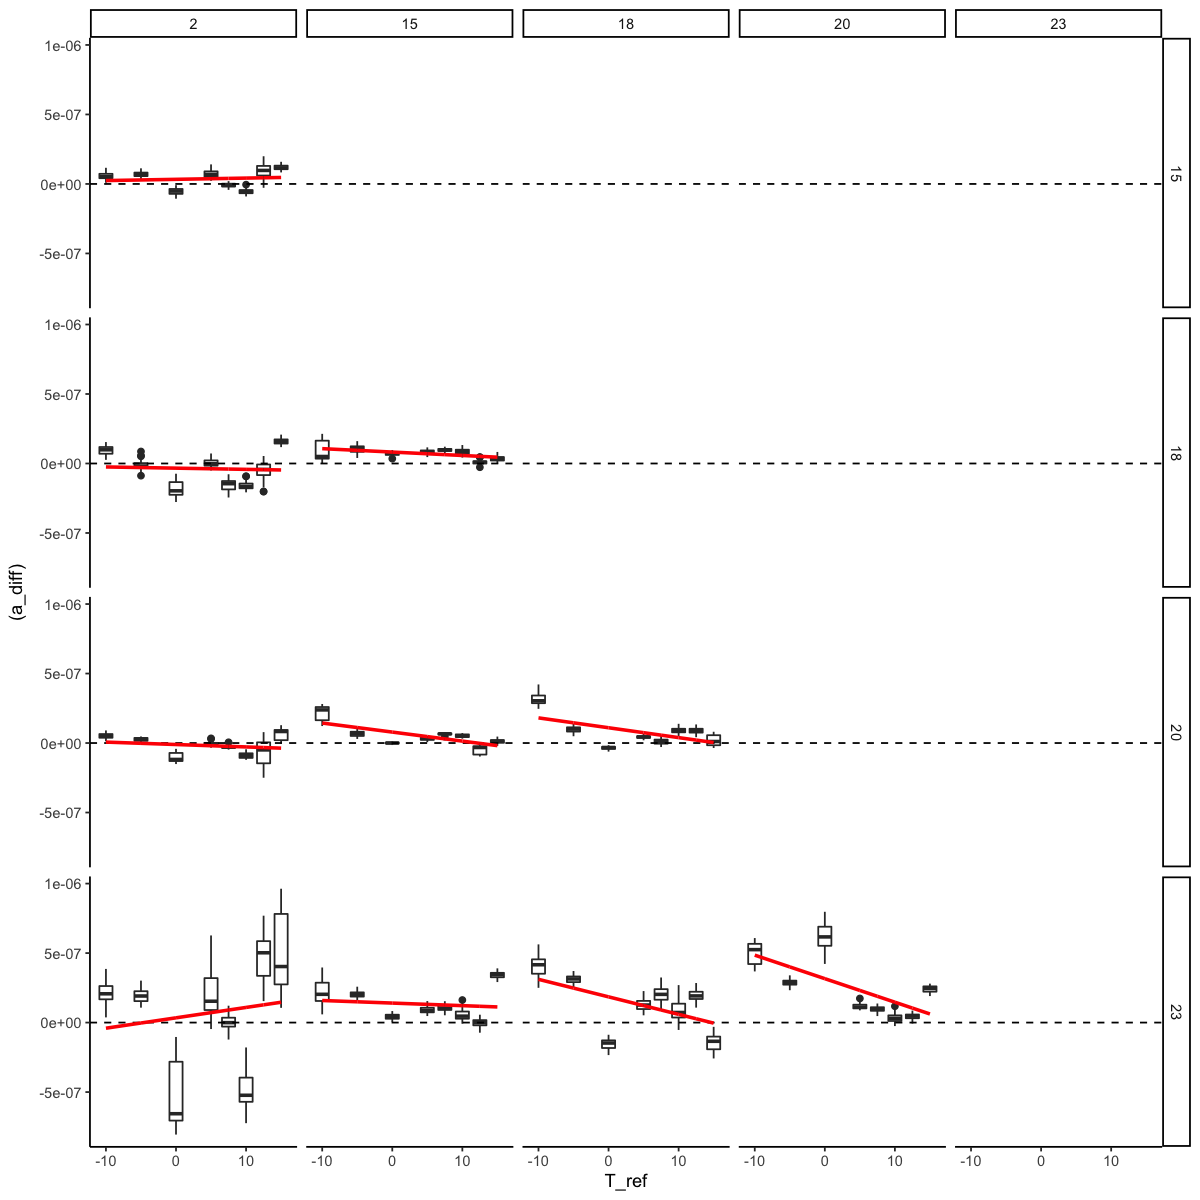

In [20]:
options(repr.plot.width = 10, repr.plot.height = 10)

empty_rows <- data.frame()

diff_df %>%
    select(OTU_pair,OTU_1,OTU_2,a_diff,T_ref) %>%
    mutate(f1 = predict(mixed_model_quad)) %>%
    add_row(OTU_pair = "23 23", OTU_1 = "23",OTU_2 = "23", a_diff = NA, T_ref = NA) %>%
    mutate(OTU_1 = factor(OTU_1, levels = c("2","15","18","20","23"))) %>%
    ggplot(aes(x=T_ref, y= (a_diff), group= paste(T_ref,OTU_pair)))+
    geom_boxplot(size = 0.5)+
    facet_grid(OTU_2~OTU_1)+
    geom_hline(yintercept = 0 , linetype = "dashed")+
    geom_line(aes(y=f1, group = OTU_pair),colour = "red", size = 1)+
    theme_classic()

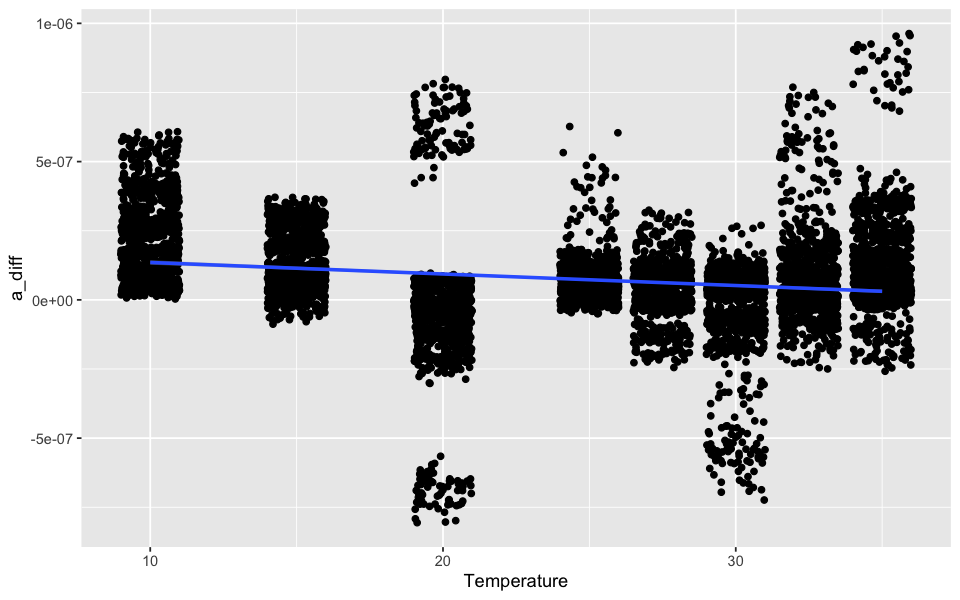

In [12]:
options(repr.plot.width = 8, repr.plot.height = 5)

diff_df %>%
    ggplot(aes(x=Temperature,y = a_diff))+
        geom_jitter()+
        geom_smooth(method = "lm", formula = y ~ poly(x,1))

In [50]:
mod <- Int_data %>%
    filter(a > -5e-7, a<5e-7) %>%
    lm(a ~ Temperature * Treatment, data = .)

summary(mod)


Call:
lm(formula = a ~ Temperature * Treatment, data = .)

Residuals:
       Min         1Q     Median         3Q        Max 
-5.417e-07 -4.327e-08  1.760e-09  5.319e-08  4.885e-07 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.135e-08  3.837e-09  13.380  < 2e-16 ***
Temperature                     -4.482e-10  1.492e-10  -3.004  0.00267 ** 
TreatmentNonevolved             -1.559e-07  5.462e-09 -28.544  < 2e-16 ***
Temperature:TreatmentNonevolved  3.983e-09  2.123e-10  18.763  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.086e-07 on 15748 degrees of freedom
Multiple R-squared:  0.09769,	Adjusted R-squared:  0.09751 
F-statistic: 568.3 on 3 and 15748 DF,  p-value: < 2.2e-16


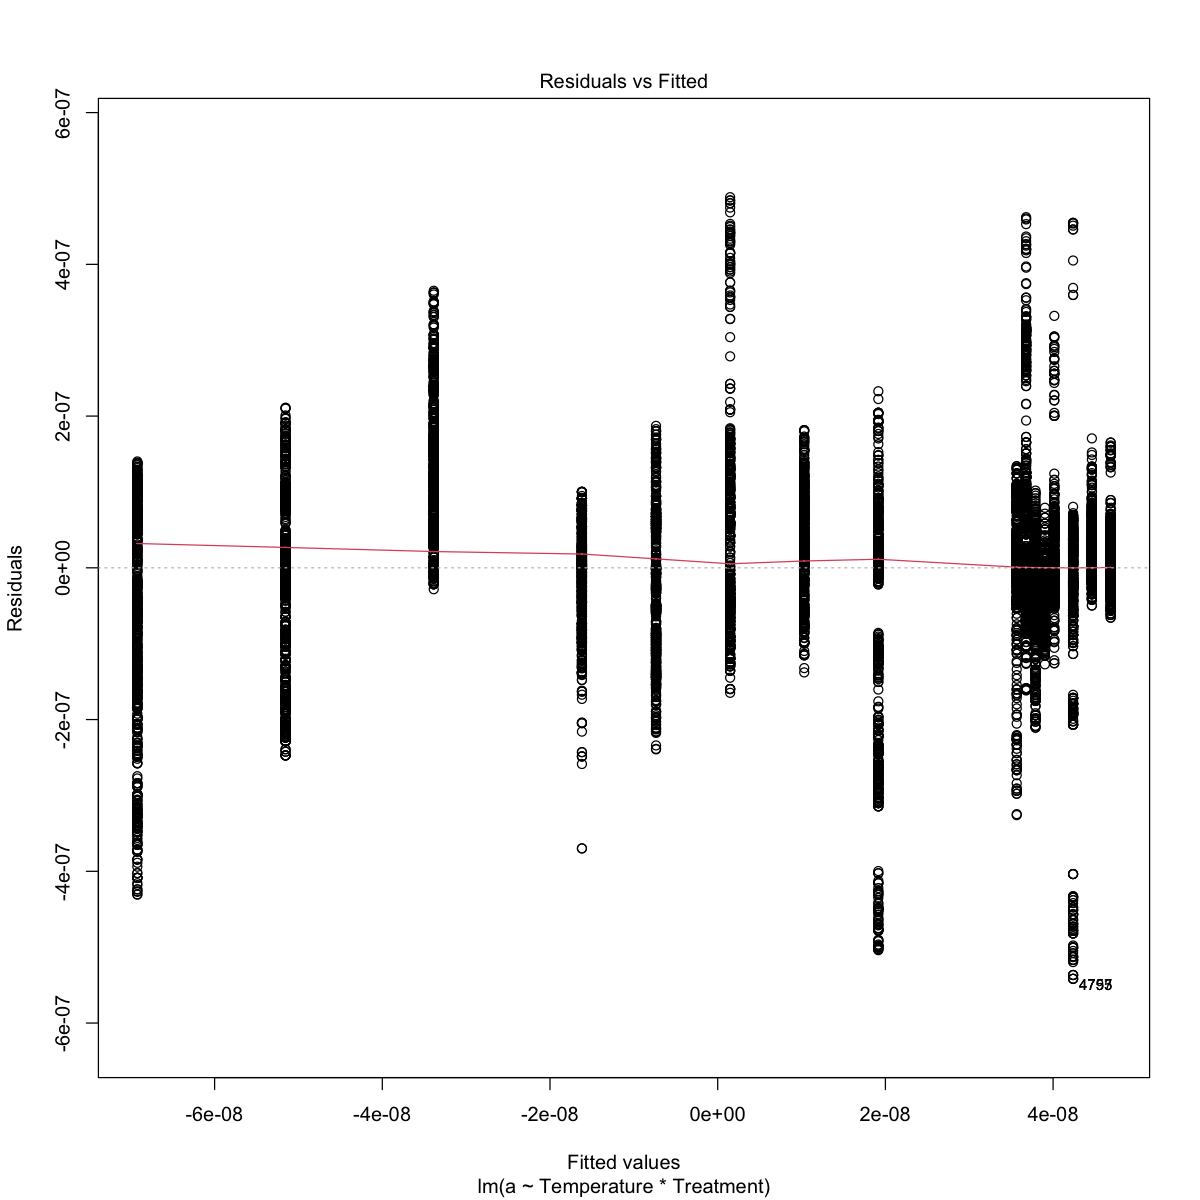

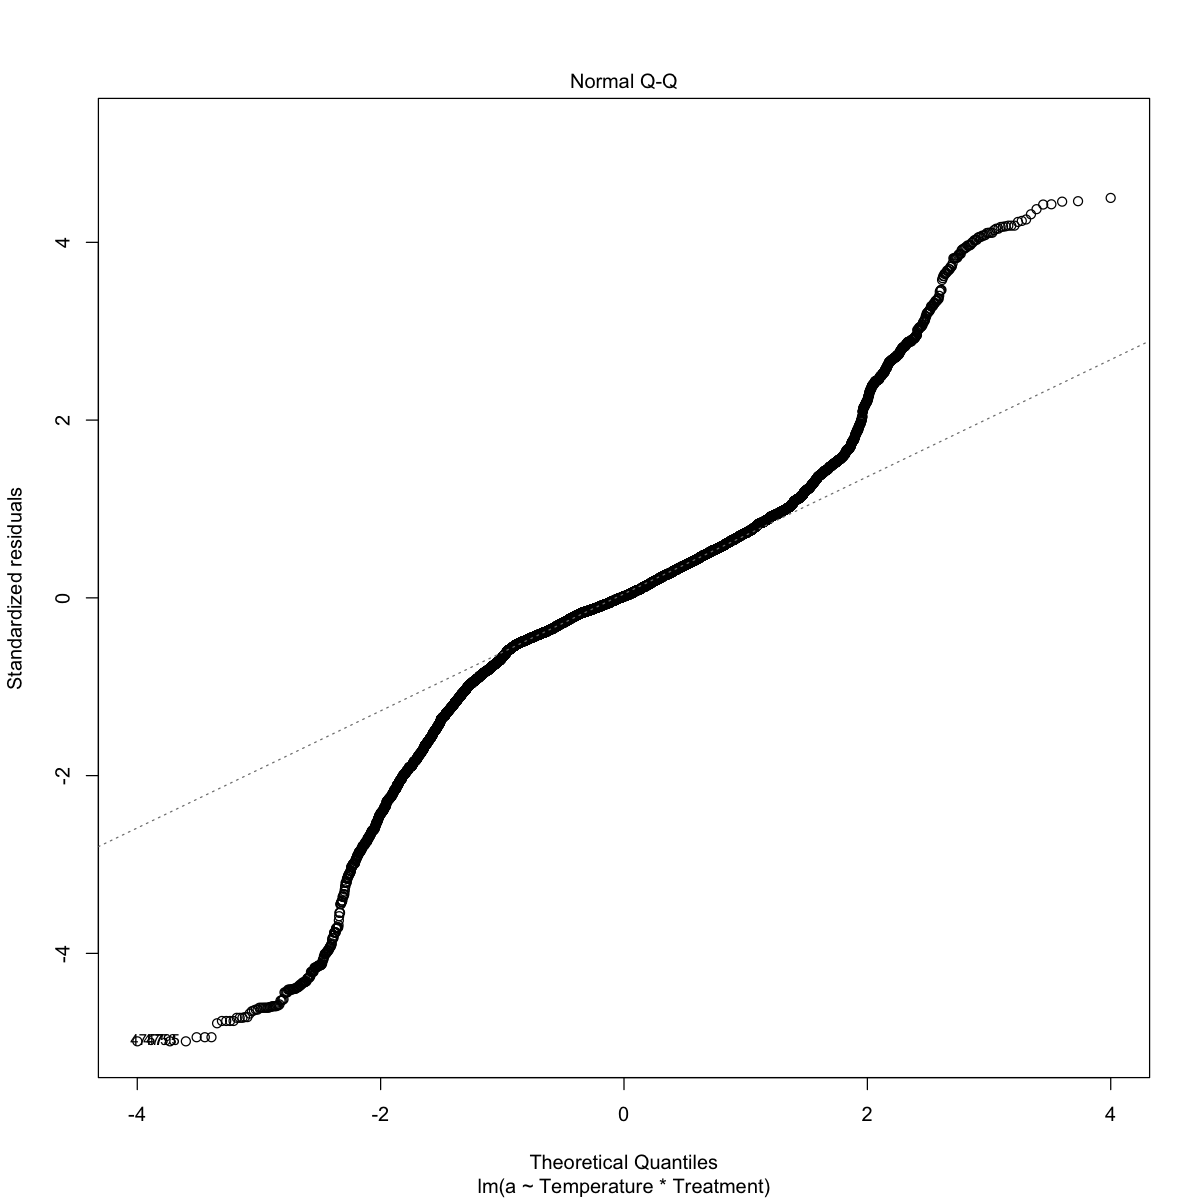

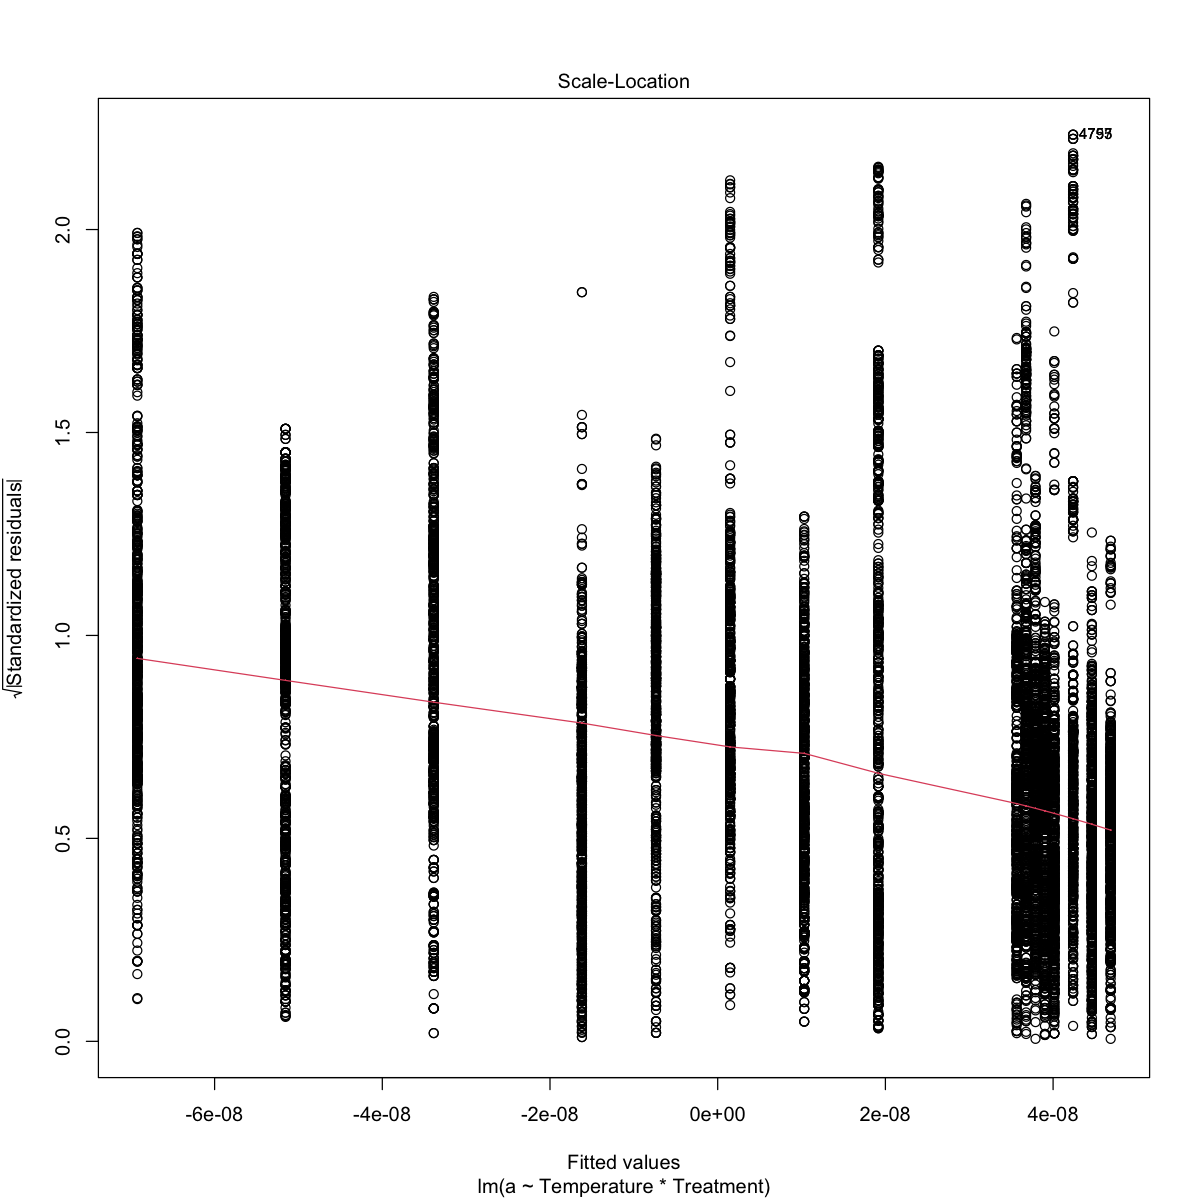

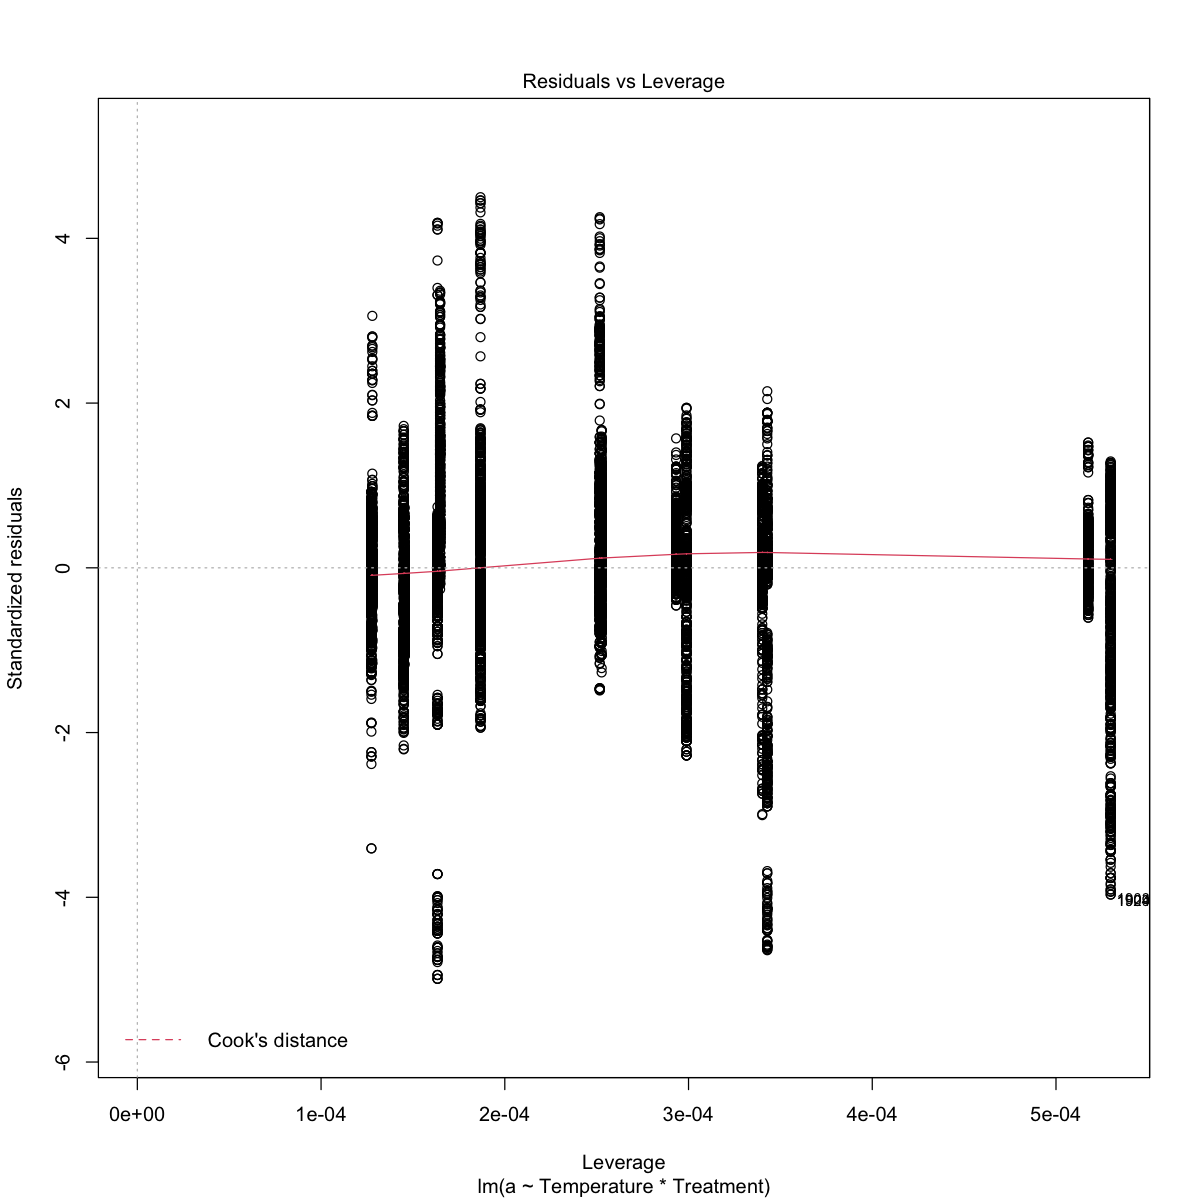

In [49]:
mod %>% plot()

`geom_smooth()` using formula 'y ~ x'



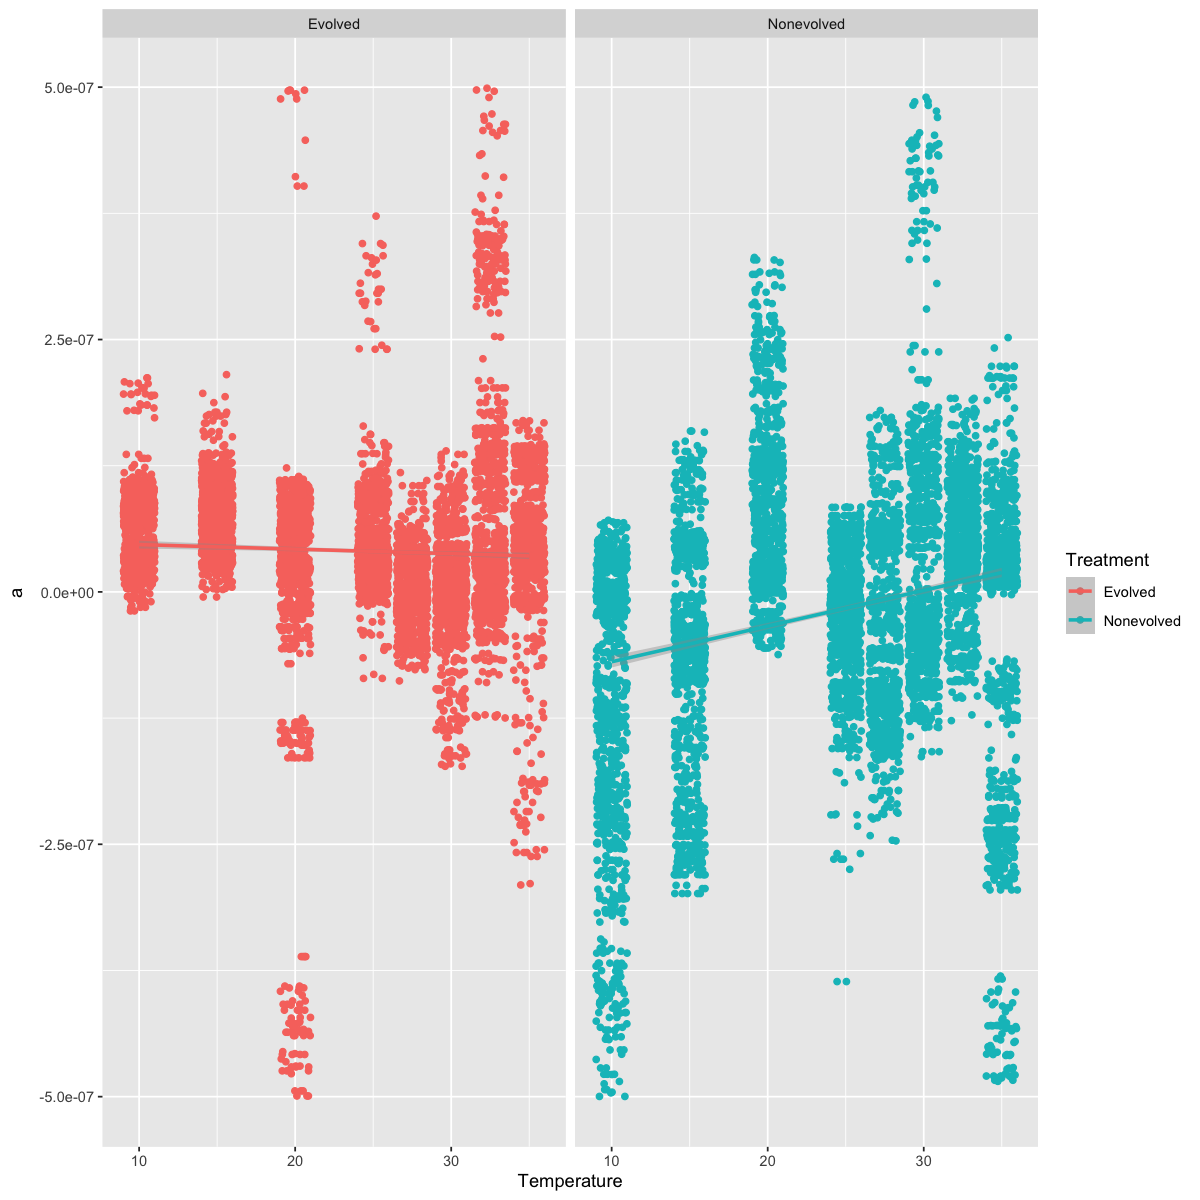

In [48]:
Int_data %>%
    filter(a > -5e-7, a<5e-7) %>%
    ggplot(aes(x=Temperature,y=a,colour = Treatment))+
        geom_jitter()+
        geom_smooth(method = "lm")+
        facet_wrap(~Treatment)

Looks like overall the evolved pairs tend to have weaker interactions (less negative) and have lower temperature sensitvity. This fits with the idea that the species evolved together are less competitive. Interestingly the estimate of interactions is generally unimodal with the lowest rates at intermediate temperatures. 

In [13]:
# #write interaction estimates
df_list <- diff_df %>%
    select(OTU_pair, Temperature, Evolved, Nonevolved) %>%
    group_by(Temperature,OTU_pair) %>%
    group_split()

for(i in 1:length(df_list)){
#     #get csv name 
    data <- df_list[[i]]
    name <- gsub(" ","_",paste(data[1,]$OTU_pair,data[1,]$Temperature))
    write_csv(data,paste0("../data/Simulations/interaction_estimates/",name,"T.csv"))
}

#meta
diff_df %>%
    group_by(OTU_pair,Temperature) %>%
    summarise(.groups = "drop") %>%
    write_csv("../data/Simulations/interaction_estimates/metadata.csv")

### Plots for interactions including the community K plots

Warning message:
“Missing column names filled in: 'X1' [1]”


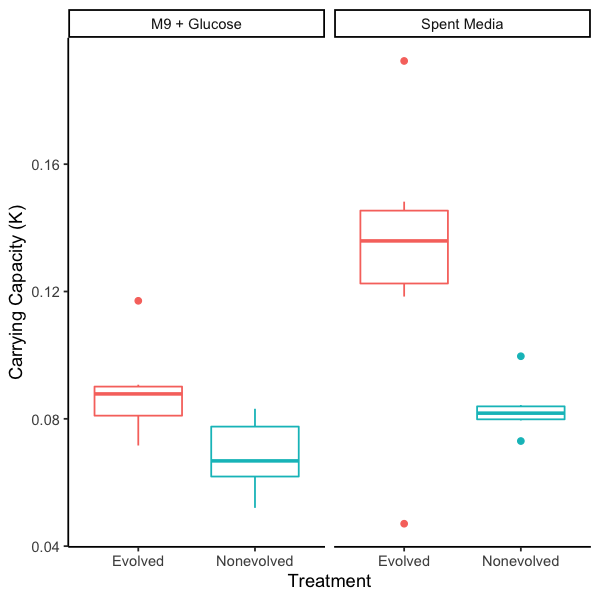

In [14]:
options(repr.plot.width = 5, repr.plot.height = 5)
p1 = read_csv("../data/Francisca/GrowthRate20C/Com_LogisticIndivcurves.csv", col_types = cols()) %>%
    separate(pa,into=c("a","Rep"),sep = ":") %>%
    separate(a, into = c("Treatment","Media"), sep = "-") %>%
    mutate(Media = ifelse(Media == "M9", "M9 + Glucose", "Spent Media")) %>%
    mutate(Treatment = recode(Treatment,"CE" = "Evolved", "CN" = "Nonevolved")) %>%
    ggplot(aes(x=Treatment, y = K, colour = Treatment))+
        geom_boxplot()+
        facet_wrap(~Media)+
        ylab("Carrying Capacity (K)") +
        theme_classic()+
        theme(legend.position = "none")

p1

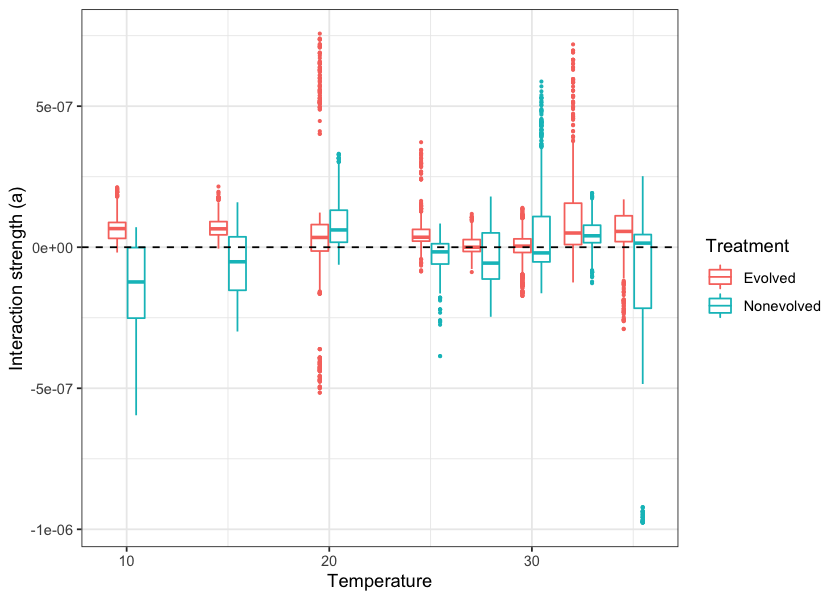

In [15]:
options(repr.plot.width = 7, repr.plot.height = 5)

p2 <- Int_data %>%
    ggplot(aes(y=a,x=Temperature,colour = Treatment, group = paste(Temperature,Treatment)))+
    geom_boxplot(outlier.size = 0.5)+
    geom_hline(yintercept = 0, linetype = "dashed")+
    theme_bw()+
    ylab("Interaction strength (a)")

p2 

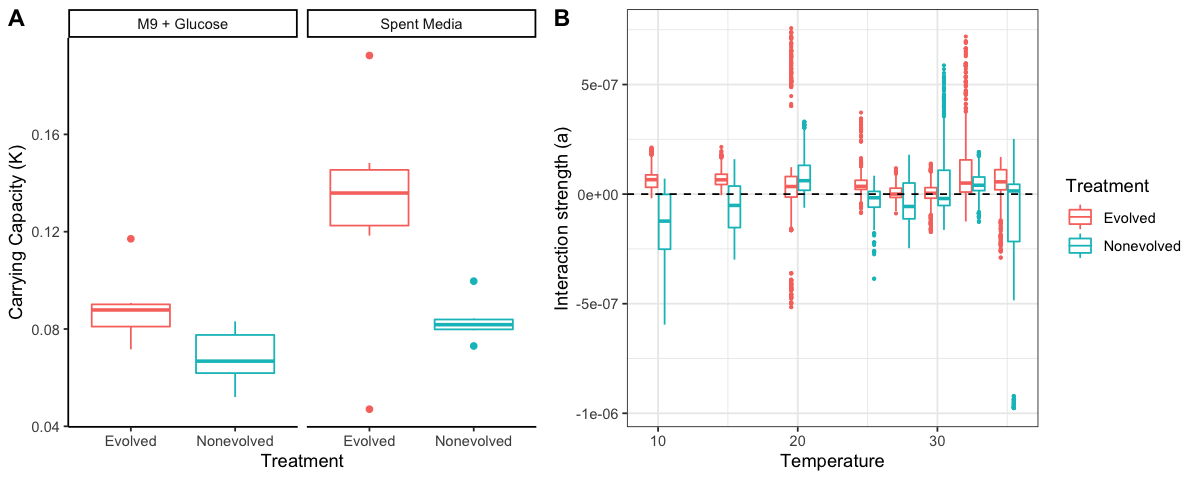

In [17]:
options(repr.plot.width = 10, repr.plot.height = 4)

plot_final = plot_grid(p1,p2, rel_widths = c(1,1.2), labels = c("A","B"))
plot_final

ggsave("../docs/Figs/maintext/Fig_2.pdf",plot_final,width = 10, height = 4)

### Simulating Communities

So taking these estimates of interactions the next step is to determine how they affect ecosysytem level respiration. To do this we take each of the bootstraped parameter colelctions (a set of growth rates and interaction terms) and simulate the dynamics that result. This uses the GLV discussed before:

$$
\frac{dC_i}{dt} = C_i (r_i + a_{ii}C_i + \sum_{i \neq j}^{N} a_{ij} C_j)
$$

By simualting over time we get solutions for biomass over time allowing us to calculate total respiration at any point from:

$$
R_{eco} = \sum_{i=0} R_i(T) \ C_i(T,t)
$$

In [19]:
#constructing communities
key <- c("2"="1","15"="2","18"="3","20"="4","23"="5")

bind_rows(int_list_flow) %>%
    mutate(OTU_1 = recode(OTU_1,!!!key), OTU_2 = recode(OTU_2,!!!key)) %>% 
    write_csv("../data/Simulations/Interaction_params.csv")

bind_rows(res_list_flow) %>%
    mutate(OTU = recode(as.character(OTU),!!!key)) %>%
     write_csv("../data/Simulations/Resp_params.csv")

bind_rows(grw_list_flow) %>%
    mutate(OTU = recode(OTU,!!!key)) %>% 
    write_csv("../data/Simulations/Growth_params.csv")

# Simulation Results

In [20]:
library(nls.multstart)
library(rTPC)
library(broom)

Com_R <- suppressMessages(read_csv("../data/Simulations/Commmunity_resp_bootstrap.csv")) %>%
    gather("Time","with_interactions",-Temp,-Treat,-Avg_int) %>%
    mutate(Time = as.numeric(Time), K = Temp + 273.15) %>%
    rename(R = with_interactions) %>%
    filter(Temp != 20.0)


ERROR: Error in library(nls.multstart): there is no package called ‘nls.multstart’


First we look at the TPCs of ecosystem respiration at differnt times

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 3)

Com_R %>%
    group_by(K,Treat,Time) %>%
    summarise(mean_R = mean(R)) %>%
    ggplot(aes(x=K,y= log(mean_R),colour = Time,group = paste(Time,Treat)))+
        geom_point()+
        facet_wrap(~Treat)

Though a little messy it generally seems that evolved communties have higher sensivity of respiration. To get an idea of this we can fit boltzman equations to get E values. 

In [ ]:
R_fits <- Com_R %>%
    group_by(K,Treat,Time) %>%
    summarise(mean_R = mean(R)) %>%
    ungroup() %>%
    mutate(mean_R = log(mean_R)) %>%
    nest(-Treat,-Time) %>%
    mutate(., ss = map(data, ~nls_multstart( (mean_R) ~ log(sharpeschoolhigh_1981(temp_k = K, exp(r_tref), e, eh, th, tref = 20)),
                       data = .x,
                       iter = 1000,
                       lower = c(r_t_ref = -10, e = 0, eh = 0, th = 280),
                       upper = c(r_t_ref = 15,  e = 30, eh = 50, th = 310),
                       start_lower = c(r_tref = -10, e = 0, eh = 0, th = 280),
                       start_upper = c(r_tref = 5 , e = 30, eh = 50, th = 305),
                       supp_errors = 'Y')))  

params_est <- R_fits %>%
    mutate(values = lapply(R_fits$ss, function(x){coef(x)}),
           params = lapply(R_fits$ss, function(x){names(coef(x))})) %>%
    select(-ss,-data) %>%
    unnest() %>%
    spread(params,values)

params_est %>%
    ggplot(aes(x=Time, y = e, colour = Treat))+
        geom_point()

In [ ]:
# #predicted data
newdata <- tibble(K = seq(min(Com_R$K), max(Com_R$K), length.out = 100))

Com_pred <- gather(R_fits, 'model', 'output', ncol(R_fits)) %>%
          unnest(., output %>% map(augment, newdata = newdata))

# #Add E estimate

options(repr.plot.width = 8, repr.plot.height = 3)

Com_R %>%
    filter(Time == 0.0) %>%
    group_by(K,Treat,Time) %>%
    summarise(mean_R = mean(R)) %>%
    ungroup() %>%
    ggplot(aes(x=K, y = log(mean_R),colour = Treat))+
    geom_point()+
    geom_line(data = Com_pred , aes(y =`.fitted`))

In [ ]:
R_fits <- Com_R %>%
    mutate(Temp = 1 / ( (273.15 + Temp) * 8.617e-5)) %>%
    nest(-Treat,-Time) %>%
    mutate(fit = map(data, ~lm(log(R) ~Temp, data = .x)),
           avg_int = unlist(map(data, ~mean(.x$Avg_int))))

# #get Estimates of E and confints
R_fits$E <- unname(unlist(lapply(R_fits$fit, function(x){( coef(x)[2] )})))

x <- lapply(R_fits$fit, function(x){data.frame(ci_lw = confint(x)[2,1], ci_hi = confint(x)[2,2] )}) %>%
    bind_rows()

R_fits <- cbind(R_fits,x)

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 3)

R_fits %>% 
    select(Time, Treat, E,ci_lw,ci_hi) %>%
    ggplot(aes(x=Time, y = -E, colour = Treat, group = paste(Treat)))+
        geom_point()+
        geom_line()+
        geom_errorbar(aes(ymin = -ci_lw, ymax = -ci_hi))+
        ylab("E")+
        geom_vline(xintercept = 5.0)

Which when plotted shows the thermal sensitvity of respiraiton across time. The black line here is the 5 hour mark at which most of the experimental measurements were made. At this point we can see the evolved treatment is more sensitive as we expect. 

In [ ]:
R_fits %>% 
    select(Time, Treat, E,ci_lw,ci_hi,avg_int) %>%
    ggplot(aes(x=avg_int, y = -E, group = Time, colour = Time))+
        geom_point()+
        geom_line()

In [ ]:
fits %>%
    select(-fit) %>%
    unnest() %>%
    filter(Temp == 0.0, E %in% sampled_mode(E,c(0.1,0.25,0.5,0.75,1.0)), tN == 10 )  %>%
    ggplot(aes(x=a, y = -E_est,colour = E, group = paste(aN)))+
        geom_point()+
        theme_cowplot()

# Communtity Respiration

In [ ]:
#adapted from Paqui's code
Com_Resp <- read_csv("../code/Francisca/RespDataLinear.csv",col_types = cols()) %>%
            filter(T >= 15 , T <= 35, Resp != 0) %>% #filter temp to 15-35 degrees , remove resp == 0
            mutate(Resp = log(abs(Resp)),K = T + 273.15) %>%
            separate(Com,into = c("Treatment","Media"),sep = "_") %>% #Parse treatment information
            mutate(Treatment = recode(Treatment, Ce = "Evolved", Cn = "Nonevolved"))


        
Com_Resp %>%
    ggplot(aes(x=K,y=Resp, colour = Treatment))+
                geom_point()+
                facet_grid(Treatment~Media)


## Nonevolved - technical replicates
As the nonevolved treatment groups are just technical replicates the mean value is used

In [ ]:
Com_Nonevolved_fits <- Com_Resp %>%
    filter(Treatment == "Nonevolved") %>%
    group_by(Media,K) %>%
    summarise(Resp = mean(Resp)) %>%
    nest(-Media) %>% 
    mutate(., ss = map(data, ~nls_multstart( (Resp) ~ log(sharpeschoolhigh_1981(temp_k = K, exp(r_tref), e, eh, th, tref = 20)),
                       data = .x,
                       iter = 1000,
                       lower = c(r_t_ref = -10, e = 0, eh = 0, th = 280),
                       upper = c(r_t_ref = 5,  e = 30, eh = 50, th = 310),
                       start_lower = c(r_tref = -10, e = 0, eh = 0, th = 280),
                       start_upper = c(r_tref = 5 , e = 30, eh = 50, th = 305),
                       supp_errors = 'Y')))    


params_nonevolved <- Com_Nonevolved_fits %>%
    mutate(values = lapply(Com_Nonevolved_fits$ss, function(x){coef(x)}),
           params = lapply(Com_Nonevolved_fits$ss, function(x){names(coef(x))})) %>%
    select(-ss,-data) %>%
    unnest() %>%
    spread(params,values)

params_nonevolved

In [ ]:
# #predicted data
newdata <- tibble(K = seq(min(Com_Resp$K), max(Com_Resp$K), length.out = 100))

Com_Nonevolved_pred <- gather(Com_Nonevolved_fits, 'model', 'output', ncol(Com_Nonevolved_fits)) %>%
          unnest(., output %>% map(augment, newdata = newdata))

#Add E estimate
Com_Nonevolved_fits$E <- lapply(Com_Nonevolved_fits$ss, function(x){coef(x)['e']})

options(repr.plot.width = 8, repr.plot.height = 3)

Com_Resp %>%
    filter(Treatment == "Nonevolved") %>%
    ggplot(aes(x=K, y = Resp,colour = Media))+
    geom_point()+
    facet_wrap(~Media) + 
    geom_line(data = Com_Nonevolved_pred , aes(y =`.fitted`))+
    geom_text(data = Com_Nonevolved_fits , x = 290, y = 3, aes(label = sprintf("'%0.3f'",E )))

## Evolved - true replicates 
The evolved treatments are true replicates so we fit to each line? 

In [ ]:
Com_Evolved_fits <- Com_Resp %>%
    filter(Treatment == "Evolved") %>%
    nest(-Replicate,-Media) %>%
    mutate(., ss = map(data, ~nls_multstart(Resp ~ log(sharpeschoolhigh_1981(temp_k = K, exp(r_tref), e, eh, th, tref = 18)),
                       data = .x,
                       iter = 1000,
                       lower = c(r_t_ref = -10, e = 0, eh = 0, th = 280),
                       upper = c(r_t_ref = 5   ,e = 30, eh = 5, th = 310),
                       start_lower = c(r_tref = -10, e = 0, eh = 0, th = 280),
                       start_upper = c(r_tref = 5  , e = 5, eh = 50, th = 310),
                       supp_errors = 'Y')))    

params_Evolved <- Com_Evolved_fits %>%
    mutate(values = lapply(Com_Evolved_fits$ss, function(x){coef(x)}),
           params = lapply(Com_Evolved_fits$ss, function(x){names(coef(x))})) %>%
    select(-ss,-data) %>%
    unnest() %>%
    spread(params,values)

params_Evolved

In [ ]:
# #predicted data
newdata <- tibble(K = seq(min(Com_Resp$K), max(Com_Resp$K), length.out = 100))

Com_Evolved_pred <- gather(Com_Evolved_fits, 'model', 'output', ncol(Com_Evolved_fits)) %>%
          unnest(., output %>% map(augment, newdata = newdata))

#Add E estimate
Com_Evolved_fits$E <- lapply(Com_Evolved_fits$ss, function(x){coef(x)['e']})


options(repr.plot.width = 7, repr.plot.height = 6)

Com_Resp %>%
    filter(Treatment == "Evolved") %>%
    ggplot(aes(x=K, y = Resp, colour = as.factor(Replicate)))+
    geom_point()+
    facet_grid(Replicate~Media) +
    geom_line(data = Com_Evolved_pred , aes(y =`.fitted`))+
    geom_text(data = Com_Evolved_fits , x = 290, y = 3, aes(label = sprintf("'%0.3f'",E )))

In [ ]:
Com_Evolved_fits_reps <- Com_Resp %>%
    filter(Treatment == "Evolved") %>%
    nest(-Media) %>%
    mutate(., ss = map(data, ~nls_multstart(Resp ~ log(sharpeschoolhigh_1981(temp_k = K, exp(r_tref), e, eh, th, tref = 18)),
                       data = .x,
                       iter = 1000,
                       lower = c(r_t_ref = -10, e = 0, eh = 0, th = 280),
                       upper = c(r_t_ref = 5   ,e = 30, eh = 5, th = 310),
                       start_lower = c(r_tref = -10, e = 0, eh = 0, th = 280),
                       start_upper = c(r_tref = 5  , e = 5, eh = 50, th = 310),
                       supp_errors = 'Y')))    

params_Evolved_reps <- Com_Evolved_fits_reps %>%
    mutate(values = lapply(Com_Evolved_fits_reps$ss, function(x){coef(x)}),
           params = lapply(Com_Evolved_fits_reps$ss, function(x){names(coef(x))})) %>%
    select(-ss,-data) %>%
    unnest() %>%
    spread(params,values)

params_Evolved_reps

In [ ]:
# #predicted data
newdata <- tibble(K = seq(min(Com_Resp$K), max(Com_Resp$K), length.out = 100))

Com_Evolved_pred_reps <- gather(Com_Evolved_fits_reps, 'model', 'output', ncol(Com_Evolved_fits_reps)) %>%
          unnest(., output %>% map(augment, newdata = newdata))

#Add E estimate
Com_Evolved_fits_reps$E <- lapply(Com_Evolved_fits_reps$ss, function(x){coef(x)['e']})

options(repr.plot.width = 8, repr.plot.height = 3)

Com_Resp %>%
    filter(Treatment == "Evolved") %>%
    ggplot(aes(x=K, y = Resp,colour = Media))+
    geom_point()+
    facet_wrap(~Media) + 
    geom_line(data = Com_Evolved_pred_reps , aes(y =`.fitted`))+
    geom_text(data = Com_Evolved_fits_reps , x = 290, y = 3, aes(label = sprintf("'%0.3f'",E )))

In [ ]:
list(params_nonevolved %>% mutate(Replicate = NA, Treatment = "Nonevolved"),
     params_Evolved %>% mutate(Treatment = "Evolved"),
     params_Evolved_reps %>% mutate(Treatment = "Evolved_rep",Replicate = NA)) %>%
bind_rows() %>%
ggplot(aes(x = Treatment, y = e))+
    geom_boxplot()+
    facet_wrap(~Media)

# Combining the two

In [ ]:
x <- list(params_nonevolved %>% mutate(Replicate = NA, Treatment = "Nonevolved"),
     params_Evolved_reps %>% mutate(Treatment = "Evolved",Replicate = NA)) %>%
    bind_rows() 
#     filter(Media == "M9")


options(repr.plot.width = 10, repr.plot.height = 3)

R_fits %>% 
    filter(Type == "with_interactions") %>%
    select(Time, Treat, Type, E,ci_lw,ci_hi) %>%
    ggplot(aes(x=Time, y = -E, colour = Treat, group = paste(Treat)))+
        geom_point()+
        geom_line()+
        geom_errorbar(aes(ymin = -ci_lw, ymax = -ci_hi))+
        ylab("E")+
        geom_vline(xintercept = 5.0)+
        geom_hline(data = x, aes(yintercept = e, linetype = Media, colour = Treatment))